In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:


data = yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800


In [33]:
data['M10'] = data['Close'].rolling(10).mean()
data['M20'] = data['Close'].rolling(20).mean()

In [34]:
df = data.dropna()

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume,M10,M20
Date,,,,,,,,
1981-01-12,0.142299,0.142299,0.141183,0.141183,0.108964,23699200,0.147489,0.138588
1981-01-13,0.136719,0.136719,0.136161,0.136161,0.105088,23049600,0.145034,0.138979
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105518,14291200,0.143025,0.139732
1981-01-15,0.139509,0.140625,0.139509,0.139509,0.107672,14067200,0.141741,0.141071
1981-01-16,0.138951,0.138951,0.138393,0.138393,0.106810,13395200,0.140179,0.142215
...,...,...,...,...,...,...,...,...
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000,177.026003,173.028501
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500,178.401003,173.353501
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800,179.679002,174.033001


In [36]:
df['Shares'] = [1 if df.loc[ei, 'M10']>df.loc[ei, 'M20'] else 0 for ei in df.index]

<ipython-input-36-1898794d61b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shares'] = [1 if df.loc[ei, 'M10']>df.loc[ei, 'M20'] else 0 for ei in df.index]


In [37]:
df

,Open,High,Low,Close,Adj Close,Volume,M10,M20,Shares
Date,,,,,,,,,
1981-01-12,0.142299,0.142299,0.141183,0.141183,0.108964,23699200,0.147489,0.138588,1
1981-01-13,0.136719,0.136719,0.136161,0.136161,0.105088,23049600,0.145034,0.138979,1
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105518,14291200,0.143025,0.139732,1
1981-01-15,0.139509,0.140625,0.139509,0.139509,0.107672,14067200,0.141741,0.141071,1
1981-01-16,0.138951,0.138951,0.138393,0.138393,0.106810,13395200,0.140179,0.142215,0
...,...,...,...,...,...,...,...,...,...
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000,177.026003,173.028501,1
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500,178.401003,173.353501,1
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800,179.679002,174.033001,1


<ipython-input-43-7686dc92758f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close1'] = df['Close'].shift(1)
<ipython-input-43-7686dc92758f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares'] ==1 else 0 for ei in df.index]


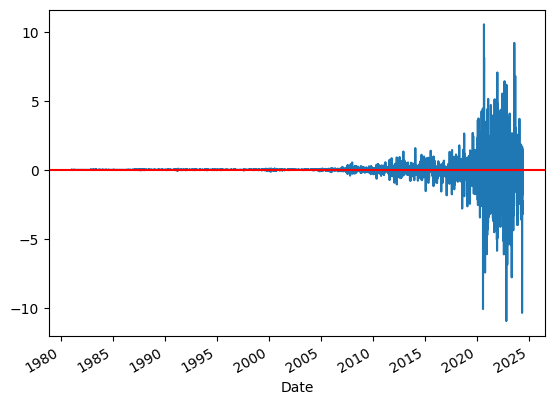

In [43]:
df['Close1'] = df['Close'].shift(1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares'] ==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')


In [44]:
df

,Open,High,Low,Close,Adj Close,Volume,M10,M20,Shares,Close1,Profit
Date,,,,,,,,,,,
1981-01-12,0.142299,0.142299,0.141183,0.141183,0.108964,23699200,0.147489,0.138588,1,NaN,NaN
1981-01-13,0.136719,0.136719,0.136161,0.136161,0.105088,23049600,0.145034,0.138979,1,0.141183,0.005022
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105518,14291200,0.143025,0.139732,1,0.136161,-0.000558
1981-01-15,0.139509,0.140625,0.139509,0.139509,0.107672,14067200,0.141741,0.141071,1,0.136719,-0.002790
1981-01-16,0.138951,0.138951,0.138393,0.138393,0.106810,13395200,0.140179,0.142215,0,0.139509,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000,177.026003,173.028501,1,182.740005,-1.830002
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500,178.401003,173.353501,1,184.570007,1.520004
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800,179.679002,174.033001,1,183.050003,-3.229996


In [45]:
df['Wealth'] = df['Profit'].cumsum()

<ipython-input-45-acdd687dff2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wealth'] = df['Profit'].cumsum()


In [46]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,M10,M20,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
1981-01-13,0.136719,0.136719,0.136161,0.136161,0.105088,23049600,0.145034,0.138979,1,0.141183,0.005022,0.005022
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105518,14291200,0.143025,0.139732,1,0.136161,-0.000558,0.004464
1981-01-15,0.139509,0.140625,0.139509,0.139509,0.107672,14067200,0.141741,0.141071,1,0.136719,-0.002790,0.001674
1981-01-16,0.138951,0.138951,0.138393,0.138393,0.106810,13395200,0.140179,0.142215,0,0.139509,0.000000,0.001674
1981-01-19,0.146763,0.147321,0.146763,0.146763,0.113270,41574400,0.139788,0.143611,0,0.138393,0.000000,0.001674
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000,177.026003,173.028501,1,182.740005,-1.830002,-201.246628
2024-05-10,184.899994,185.089996,182.130005,183.050003,183.050003,50759500,178.401003,173.353501,1,184.570007,1.520004,-199.726624
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800,179.679002,174.033001,1,183.050003,-3.229996,-202.956620


Text(0.5, 1.0, 'Total Money you win -204.10661381855607')

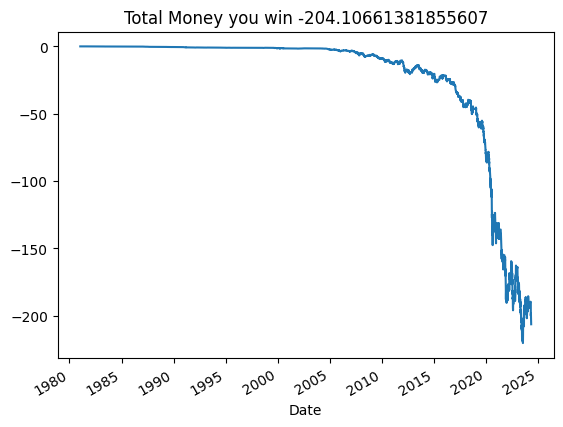

In [47]:
df['Wealth'].plot()
plt.title('Total Money you win {}'.format(df.loc[df.index[-2], 'Wealth']))

In [48]:
! pip install hmmlearn

In [49]:
from hmmlearn import hmm

In [50]:
model = hmm.GaussianHMM(n_components=3, covariance_type='full', n_iter=1000)

In [53]:
features = pd.concat([df.Profit, df.Wealth], axis=1).dropna()

In [56]:
features

,Profit,Wealth
Date,,
1981-01-13,0.005022,0.005022
1981-01-14,-0.000558,0.004464
1981-01-15,-0.002790,0.001674
1981-01-16,0.000000,0.001674
1981-01-19,0.000000,0.001674
...,...,...
2024-05-09,-1.830002,-201.246628
2024-05-10,1.520004,-199.726624
2024-05-13,-3.229996,-202.956620


In [57]:
model.fit(features)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [69]:
feat = pd.DataFrame(features)
index = data['Close'].index[:len(features)]

<Axes: >

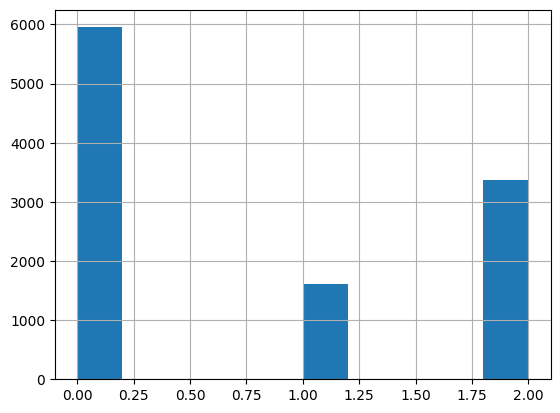

In [70]:
states = pd.Series(model.predict(features), index=index)
states.name = 'state'
states.hist()

<Axes: xlabel='Date'>

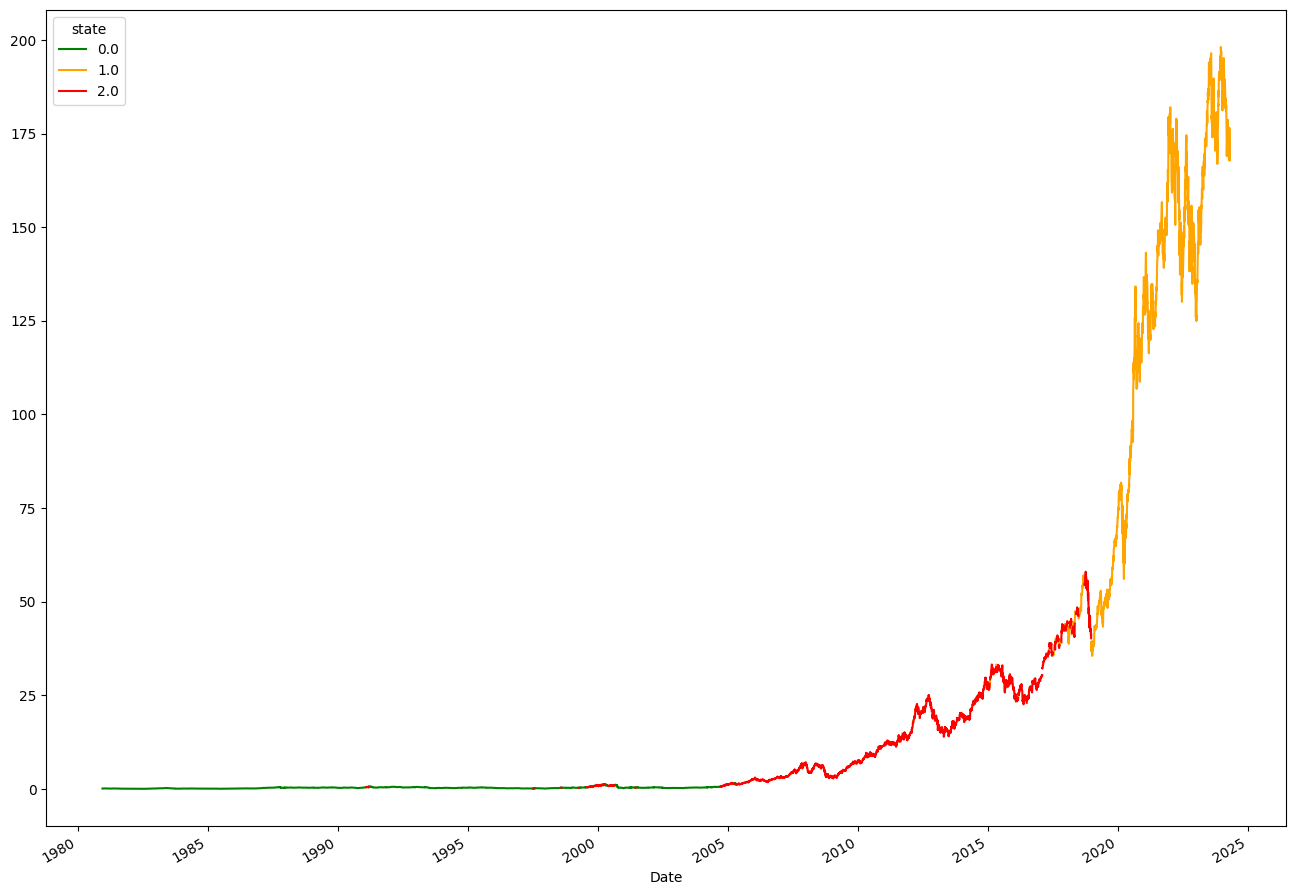

In [74]:
color_map = {
    0.0 : 'green',
    1.0 : 'orange',
    2.0 :'red'
}
(
    pd.concat([data.Close, states], axis=1).dropna()
    .set_index("state", append=True).Close
    .unstack("state")
    .plot(color=color_map, figsize=[16, 12])
    )


Text(0.5, 1.0, 'Money ')

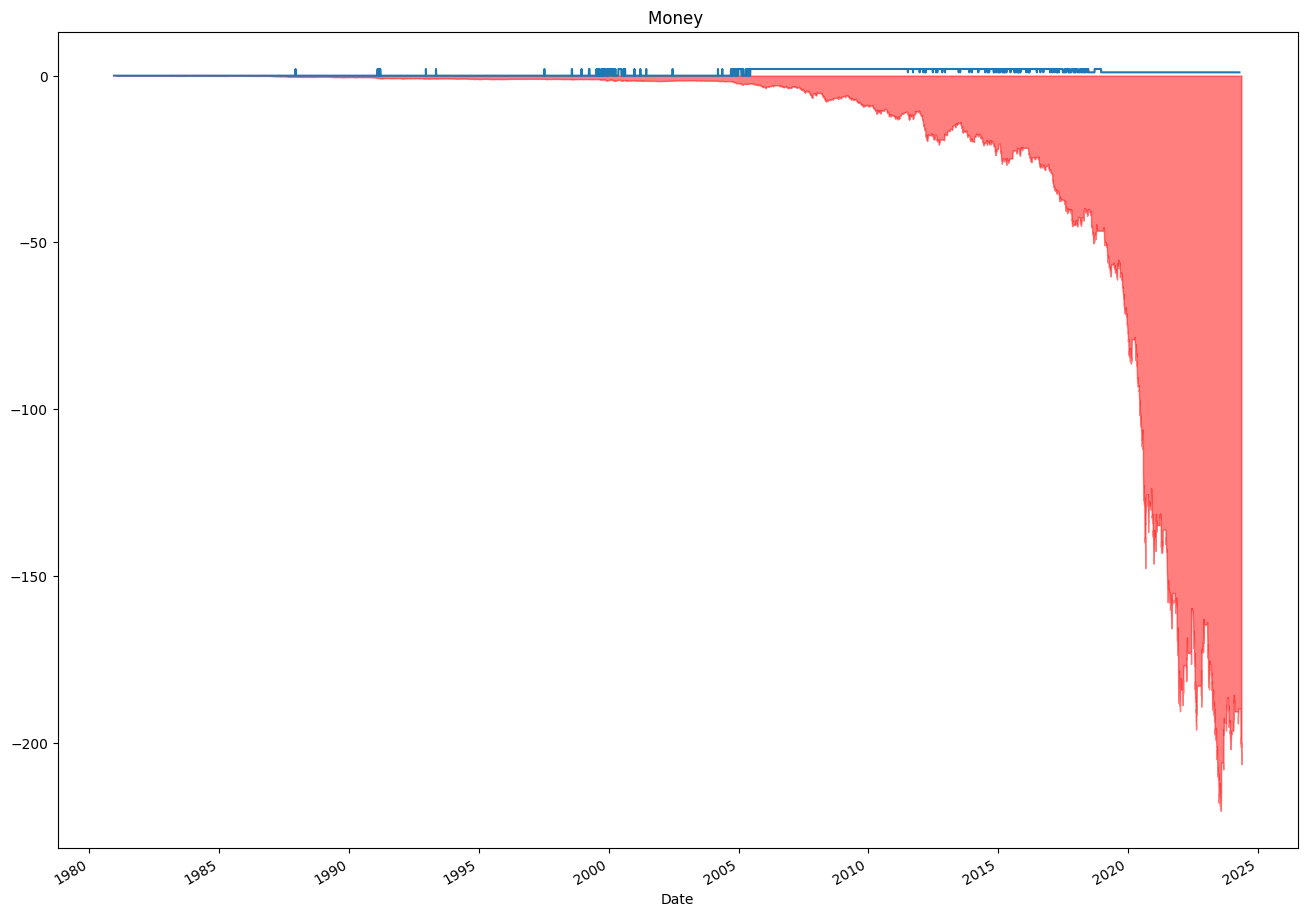

In [80]:
ax = states.plot(figsize=[16,12])
ax.fill_between(features.index, 0, features['Wealth'], color='red', alpha=0.5)
ax.set_title('Money ')